# Compartment model
Pharmacokinetic compartment model consisting of absorption, elimination and metabolization.

![Compartment Model](03_compartment_model.png)

## Implementation of the compartment model

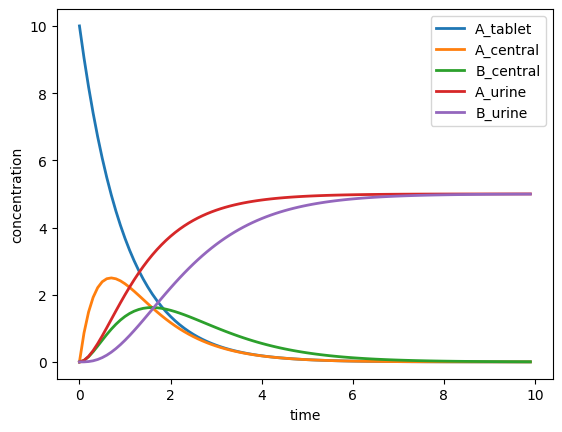

In [16]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pylab as plt

def dydt_compartment_model(x, t, ka, km, ke):
    """
    System of ODEs of the compartment model.
    """
    # state variables
    A_tablet = x[0]
    A_central = x[1]
    B_central = x[2]
    A_urine = x[3]
    B_urine = x[4]
    
    # rates
    va = ka * A_tablet
    vm = km * A_central
    vuA = ke * A_central
    vuB = ke * B_central

    # odes (stoichiometric equation)    
    return [
        -va,             # dA_tablet/dt
         va - vm - vuA,  # dA_central/dt
         vm - vuB,       # dB_central/dt
         vuA,            # dA_urine/dt
         vuB,            # dB_urine/dt
    ] 


# initial condition and time span
t = np.arange(0, 10, 0.1)
Dose_A = 10.0
x0 = [
    Dose_A,  # A_tablet
    0.0,   # A_central
    0.0,   # B_central
    0.0,   # A_urine
    0.0,   # B_urine
]

# parameters
ka = 1.0
km = 1.0
ke = 1.0

x = odeint(dydt_compartment_model, x0, t, args=(ka, km, ke))
names = ["A_tablet", "A_central", "B_central", "A_urine", "B_urine"]

f, ax = plt.subplots(nrows=1, ncols=1)
for k, name in enumerate(names):
    ax.plot(T, x[:, k], linewidth=2, label=name)

ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("concentration")

plt.show()

## The effect of metabolism on urinary recoveries
We are interested in how the metabolic rate alteres the amounts recovered of A and B in the urine. We systematically alter the parameter for the metabolisation rate `km` determining the conversion $$A \rightarrow B$$

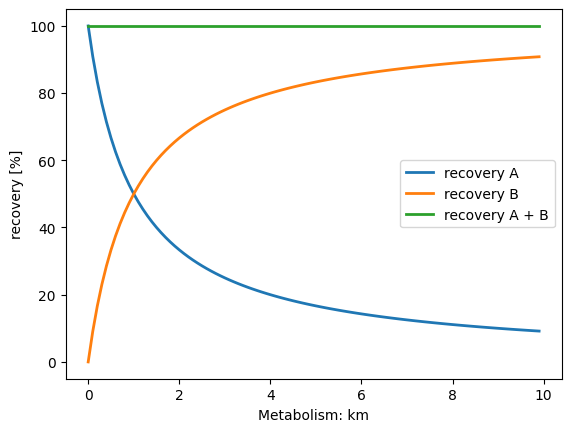

In [21]:
kms = np.arange(0, 10, 0.1)
A_recovery = np.zeros_like(kms)
B_recovery = np.zeros_like(kms)

for k, km_new in enumerate(kms):
    x = odeint(dydt_compartment_model, x0, t, args=(ka, km_new, ke))
    A_recovery[k] = x[-1, 3]  # A_urine(end)
    B_recovery[k] = x[-1, 4]  # B_urine(end)

A_recovery = A_recovery/Dose_A
B_recovery = B_recovery/Dose_A
    



f, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(kms, A_recovery * 100, linewidth=2, label="recovery A")
ax.plot(kms, B_recovery * 100, linewidth=2, label="recovery B")
ax.plot(kms, (A_recovery + B_recovery) * 100, linewidth=2, label="recovery A + B")
ax.legend()
ax.set_xlabel("Metabolism: km")
ax.set_ylabel("recovery [%]")

plt.show()

**Exercise**: Does the absorption rate of A have an effect on the urinary recovery of B?